# Somatotopy code tutorial 4- map analysis

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import touchsim as ts
from touchsim.plotting import plot, figsave
import numpy as np
import pickle as pk
import holoviews as hv
hv.notebook_extension()
%output holomap='scrubber' # animate holomaps
import somatotopic_maps as sp
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Load pre-made input set and hand population

In [2]:
# load the sample hand pop (tutorial 1)
with open('hand_pop_obj.pkl', 'rb') as f:
    hand_pop = pk.load(f)

:Overlay
   .NdOverlay.I :NdOverlay   [Element]
      :Points   [x,y]
   .Path.I      :Path   [x,y]
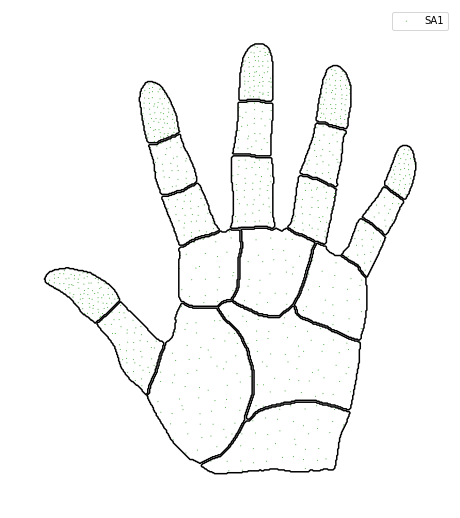

In [3]:
# plot the hand surface and afferents
%output size=250
plot(hand_pop.ts_hand,tags=True,coord=10) * plot()

In [4]:
print(hand_pop.ts_hand.surface)

Surface with 20 regions.


In [5]:
# load the sample input set (tutorial 2)
with open('hand_inputs_tutorial.pkl', 'rb') as file:
    inputs = pk.load(file)

input_responses = inputs.input_data

## Run the SOM algorithm

Iterations: 100%|██████████████████████████████████████████████████████████████| 20000/20000 [00:07<00:00, 2593.56it/s]


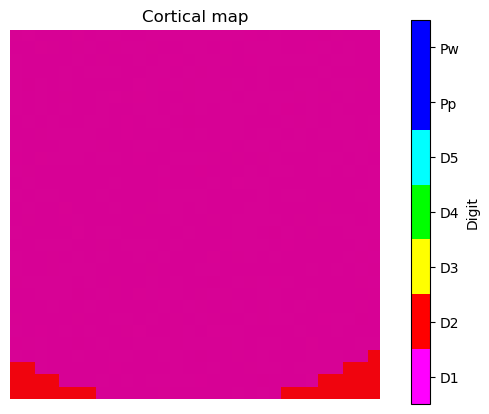

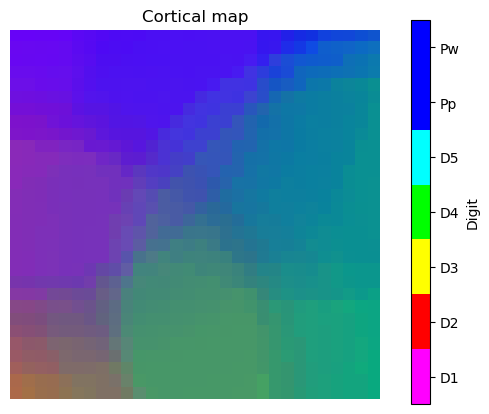

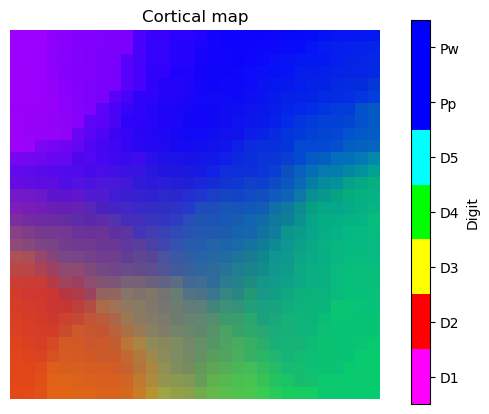

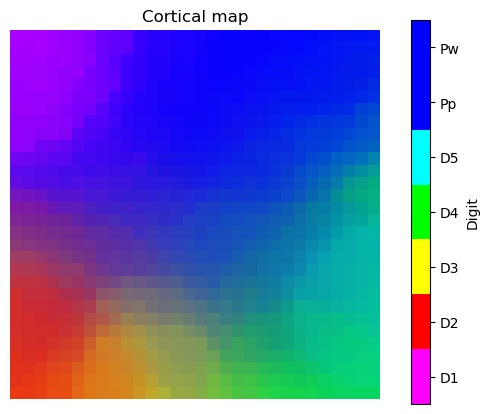

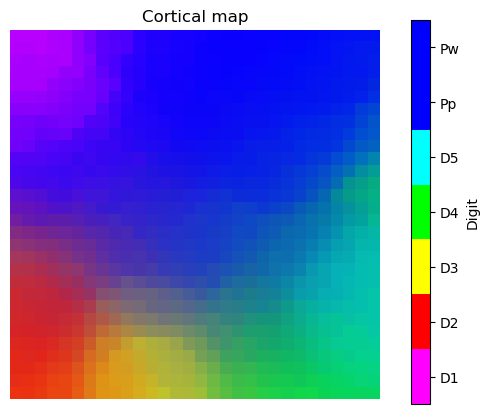

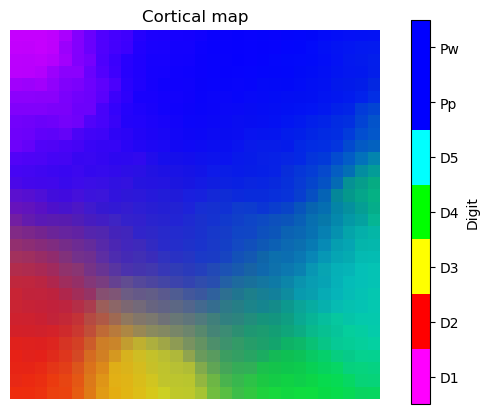

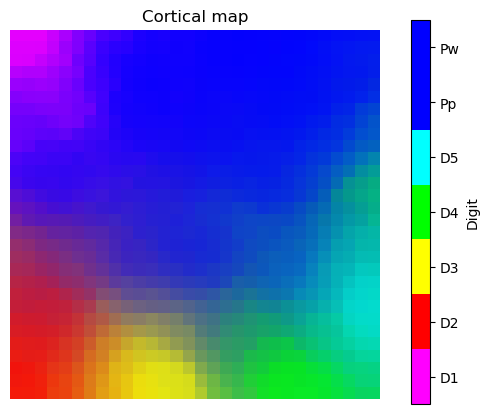

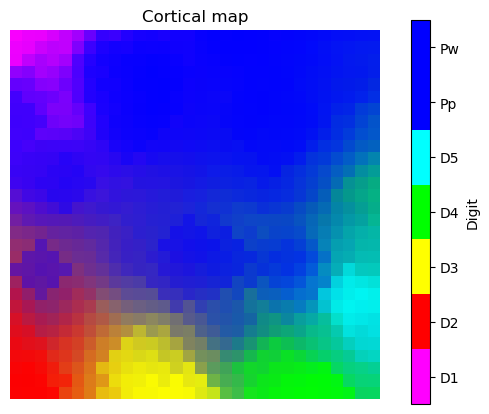

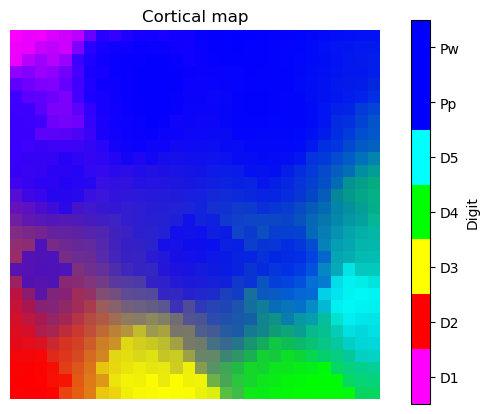

In [6]:
# Use the loaded inputs to train the map

# train using 20000 inputs
input_num = 20000
update_savepath = ''

# run SOM algorithm
som_map = sp.K_SOM(sheet_size_a=30, sheet_size_b=30, seed=0)

som_map.fit(input_responses, input_num=input_num, input_order='rand', update_plots=True, 
                                              update_plot_data=[hand_pop.hand_main, update_savepath])

weights = som_map.w.T
weights_change = som_map.w_change
l_r = som_map.l_r
n_s = som_map.n_R2

### Plot standard map

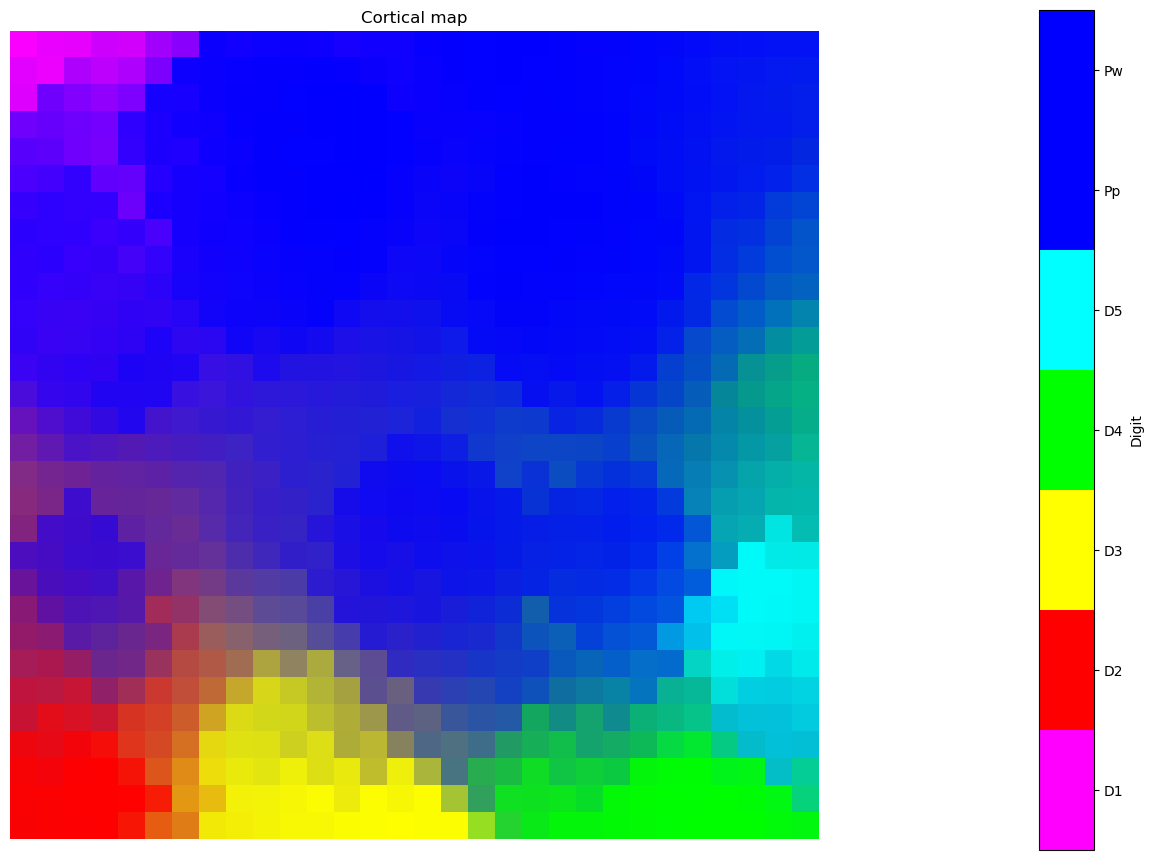

In [7]:
# plot map
map_standard = sp.view_map(som_map.w.T, hand_pop.hand_main, save_name='example_map.png')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

### Plot winner takes all map

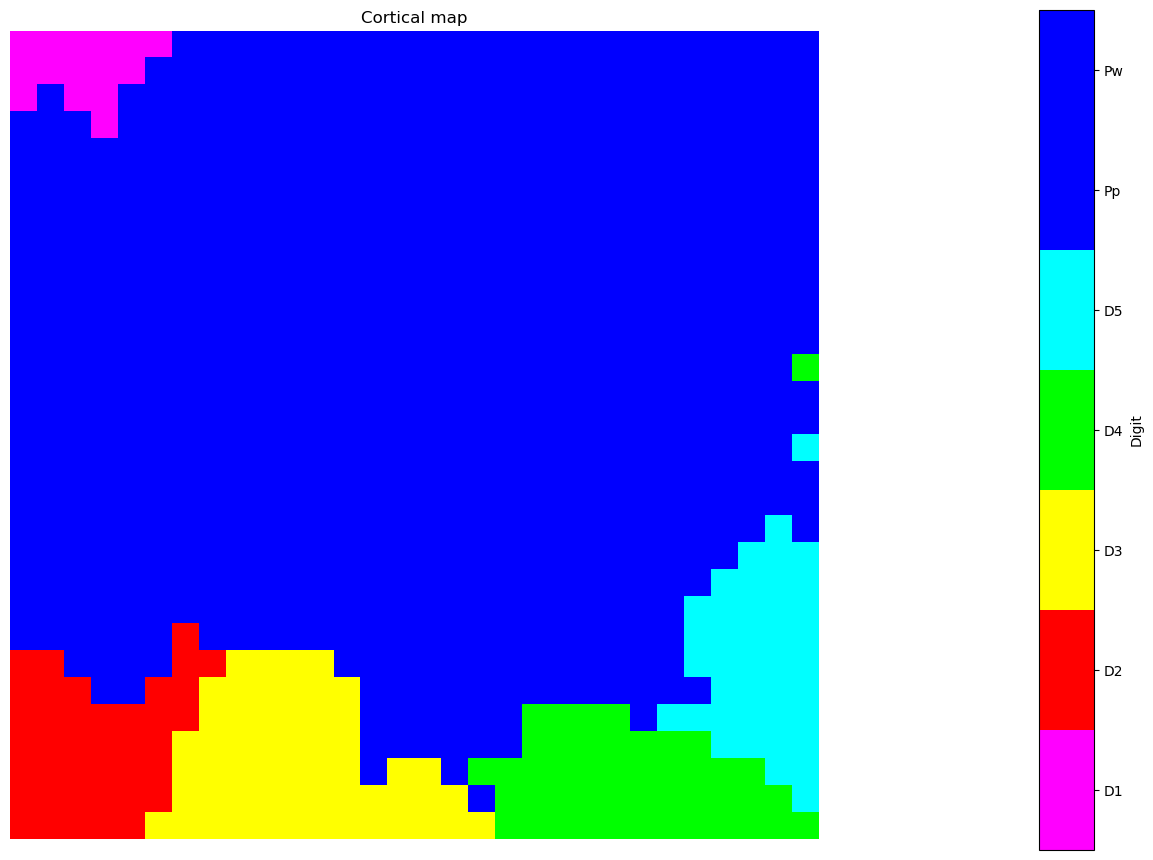

In [8]:
weights_wta, _  = sp.wta_weights(weights, hand_pop.hand_main, method='wta_1')

map_wta = sp.view_map(weights_wta, hand_pop.hand_main)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

## Map analysis

Map analysis options:

1. Area sizes, can be calculated based on the WTA map or using a threshold. The WTA map returns as either number of cortical units in each area, or percentages. Thresholded returns as a number of cortical units (as overlaps are included).

2. Overlaps, dice coefficient can be calculated between any map regions. Uses a threshold. Returns Dice coefficient as a heatmap showing similarity between all regions. 

3. Distances between map regions, distances between the centroids on the hand versus the map.

4. Receptive field measures- plotting and sizes.

### Area sizes

There are 3 options for WTA area size calcuation. Set the method equal to the WTA type to use that calculation.
1. 'wta_1'- Winning region is the region of the largest afferent weight. This is a single unit determined WTA calculation, and doesn't consider if there are lots of units all with near equally large weights to that unit.
2. 'wta_2'- Mean weight from each region to the unit is calculated. The winning region is that with the largest mean weight.
3. 'wta_3'- Weights from each region are summed. The winning region is that with the largest total weight.

#### Area size WTA 1- Single afferent winner

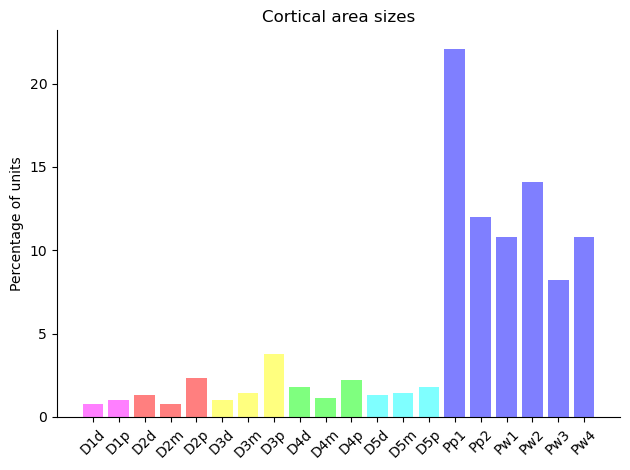

In [9]:
counts1 = sp.area_size(weights, hand_pop.hand_sub, method='wta_1')
sp.plot_area_size(counts1, hand_pop.hand_sub)

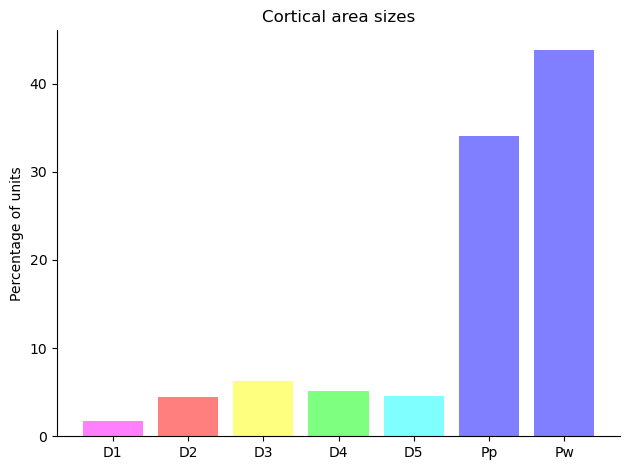

In [10]:
counts1 = sp.area_size(weights, hand_pop.hand_main, method='wta_1')
sp.plot_area_size(counts1, hand_pop.hand_main)

#### Area size WTA method 2- mean weights

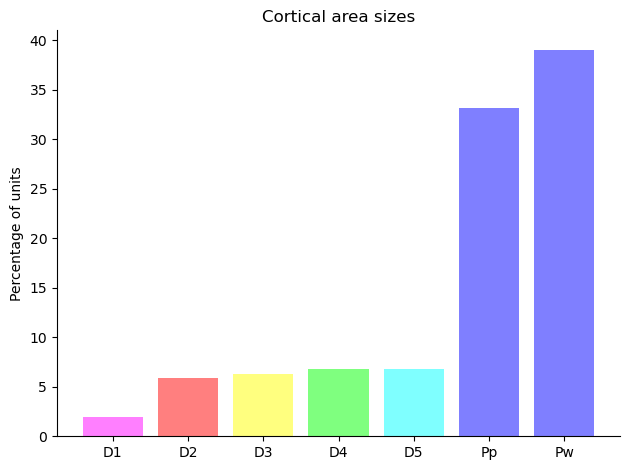

In [11]:
counts2 = sp.area_size(weights, hand_pop.hand_main, method='wta_2')

# plot area sizes
sp.plot_area_size(counts2, hand_pop.hand_main)

#### Area size WTA method 3- summed weights

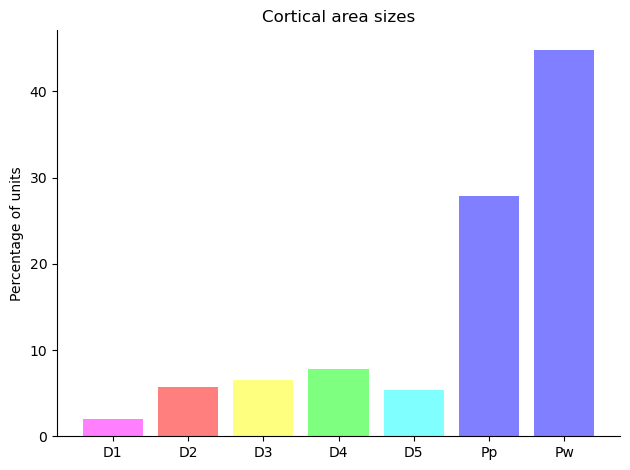

In [12]:
counts3 = sp.area_size(weights, hand_pop.hand_main, method='wta_3')

# plot area sizes
sp.plot_area_size(counts3, hand_pop.hand_main)

#### Comparing the three methods

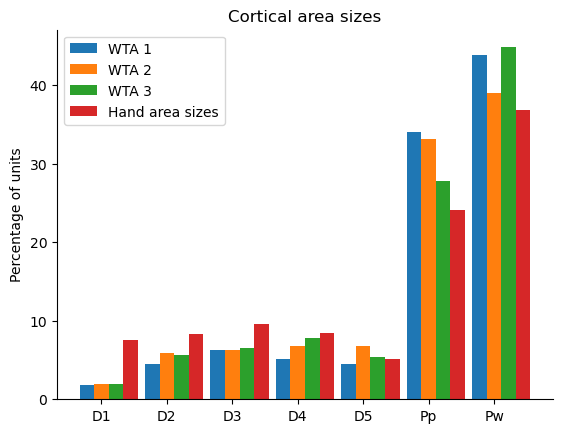

In [13]:
# add all values to array
area_sizes, _, _ = sp.get_hand_area_sizes(hand_pop.hand_rp_main)

# put all data together to compare
counts_all = np.vstack(([counts1, counts2, counts3, area_sizes]))

sp.WTA_method_compare(counts_all.T, hand_pop.hand_main, plot_type='per')

### Cortical overlaps
Calculates the cortical overlap between the hand regions' representations. A threshold needs to be applied.

In [14]:
# get overlaps for all regions
overlap_idx_list, overlap_counts, overlap_weights = sp.cortical_overlaps(weights, hand_pop.hand_main, threshold = 0.1)


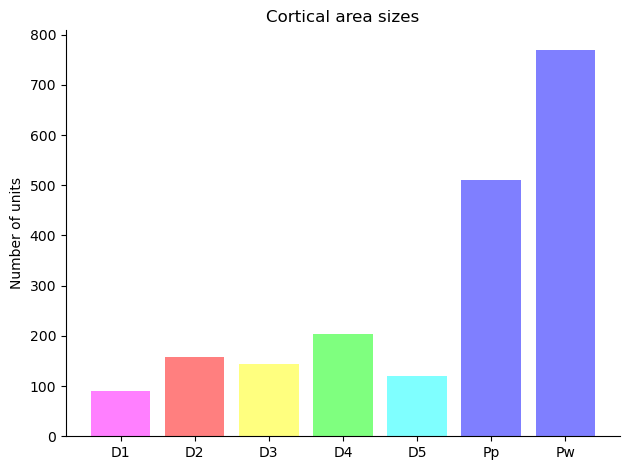

In [15]:
# Calculate the area size when an overlap threshold is included- plotted as the number of map units.
overlap_counts = np.squeeze(overlap_counts)

# plot area sizes
sp.plot_area_size(overlap_counts, hand_pop.hand_main, plot_type='unit')

#### Dice heatmap
Calculate the Dice coefficient for combinations of different regions.
Dice of 1 means full overlap, Dice of zero means no overlapping units.

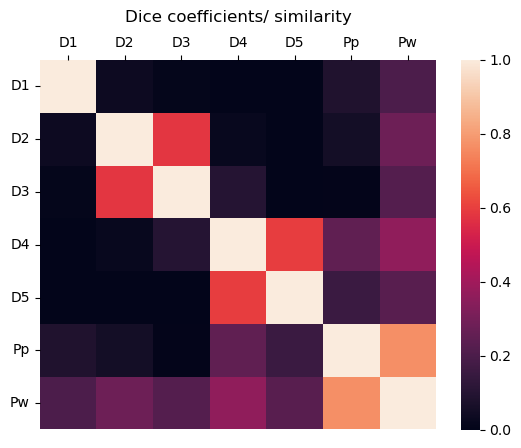

In [16]:
# Dice coefficient heatmap for the main regions
region_list = hand_pop.hand_main['region_list']

# Dice coefficient heatmap for the main regions
sp.dice_all(overlap_idx_list, region_list, plot=True);

#### Dice threshold finger maps
Plot a hand map showing just the thesholded map for one hand region. Here we will compare two different thresholds for comparison of the second and third digit.

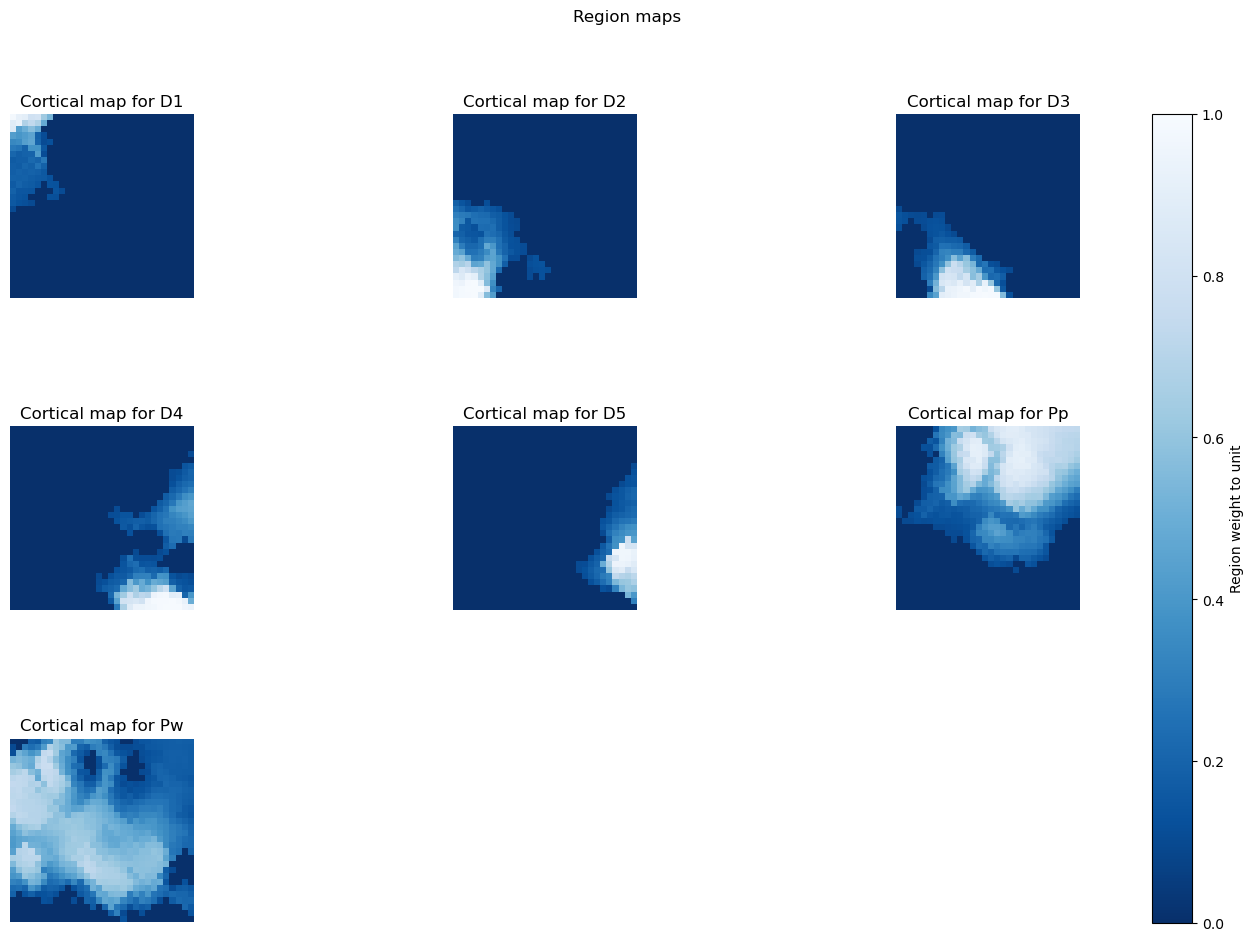

In [17]:
# Map for D2- lower threshold
map_out = sp.view_map_all_regions(overlap_weights, region_list, cmap_region='Blues_r')

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

##### You can also view single maps

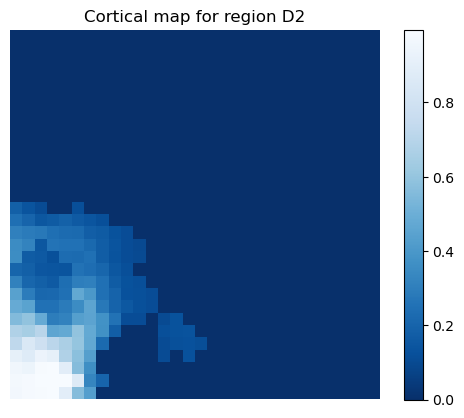

In [18]:
map_out = sp.view_map_one_region(overlap_weights, region_list, cmap_region='Blues_r', region_code=1)

##### And change the map colours

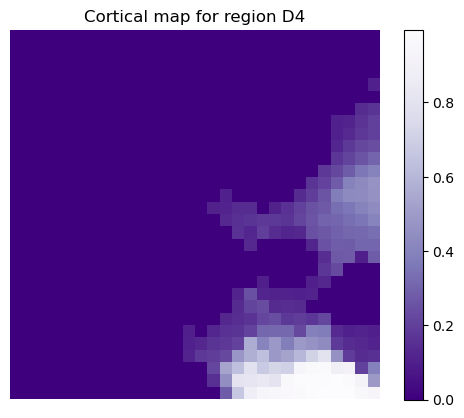

In [19]:
map_out = sp.view_map_one_region(overlap_weights, region_list, cmap_region='Purples_r', region_code=3)

### Overlap maps

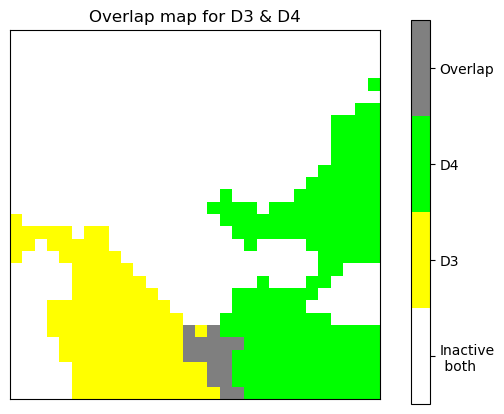

In [20]:
# View overlap map for D3 and D4 with normal colormap
map_out = sp.view_map_overlap(overlap_weights, region_list, region_code=[2,3], rgb_color_codes=hand_pop.hand_main['rgb_all'])

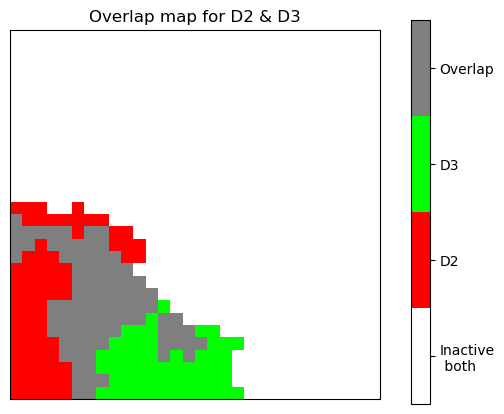

In [21]:
# View overlap map for D2 and D3 with normal auto colormap
map_out = sp.view_map_overlap(overlap_weights, region_list, region_code=[1,2])

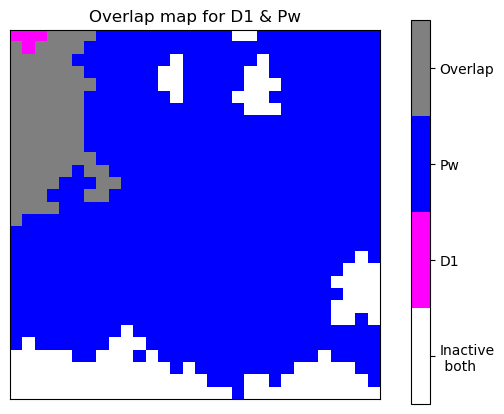

In [22]:
# View overlap map for D1 and Pw
map_out = sp.view_map_overlap(overlap_weights, region_list, region_code=[0,6], rgb_color_codes=hand_pop.hand_main['rgb_all'])

### Distances on map
Distances on the map can be calculated as one of the following:

1. 'max_unit' - Maximally active unit from the afferents/ inputs in that region of the hand.

2. 'com' - Weight centroid on the map (of the map for that region of the hand, which unit represents the centre of mass of the weights)

3. 'hand_max_unit' - Unit of the maximially active weight for the afferent closest to the centroid for that region on the hand.


Show a heatmap of distances between each hand region on the map. 
Heatmaps can also be made for distances between the specific phalanges of the fingers eg. proximal, medial and distal.

#This is calculated as the distances between the unit most strongly representing the centroid of the hand (biggest weight).

### Distances with 'Hand max unit'

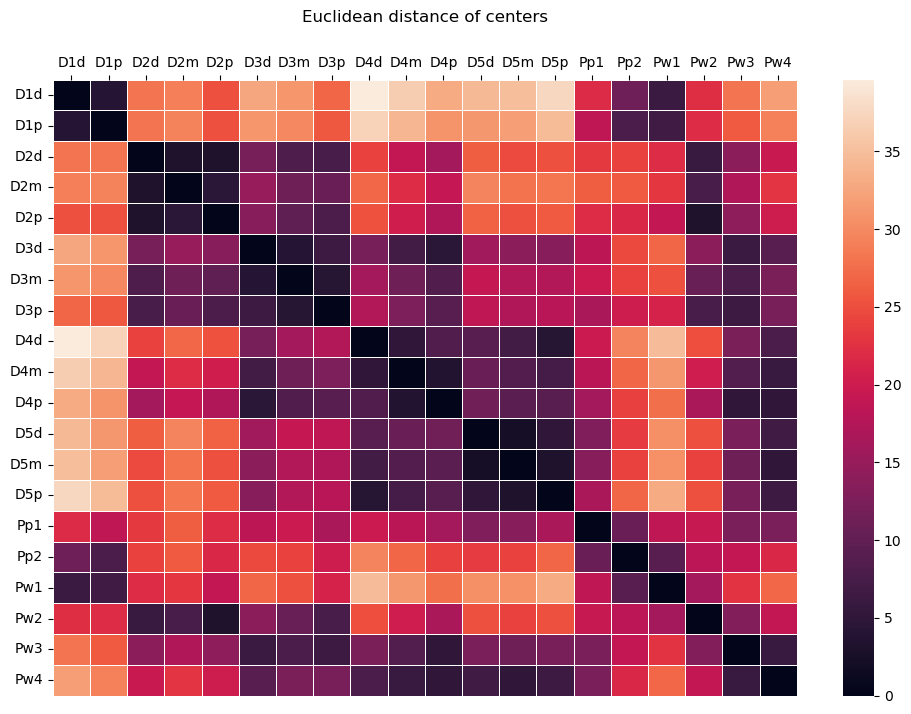

In [23]:
# Distances between hand regions on the map
cent = sp.plot_distance_all(weights, hand_pop)

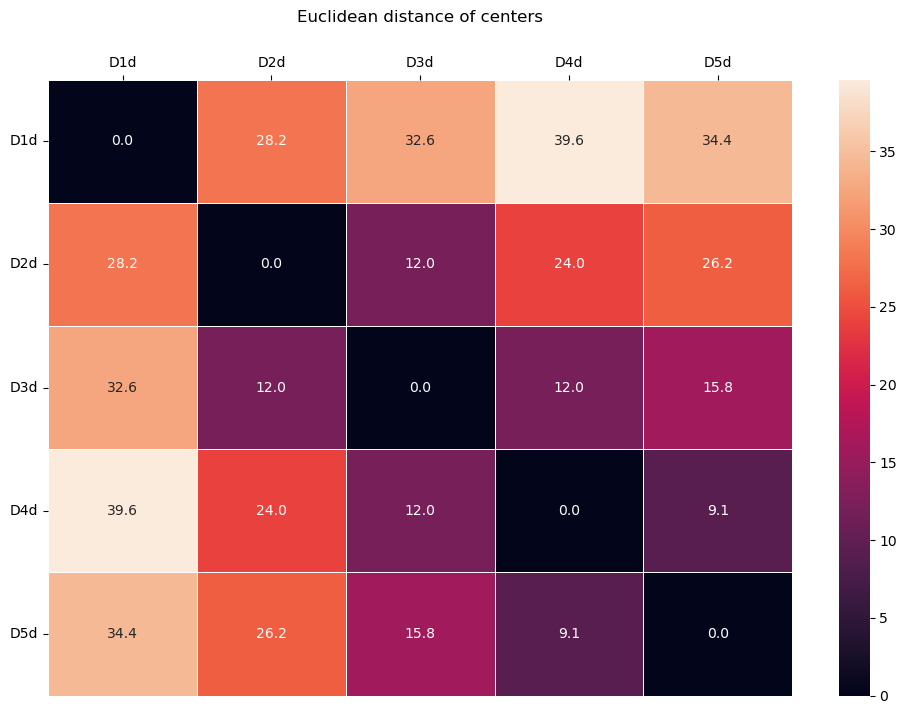

In [24]:
# distance between fingertips on the map.

sp.plot_distance_phalanges(weights, hand_pop, phalange='d')

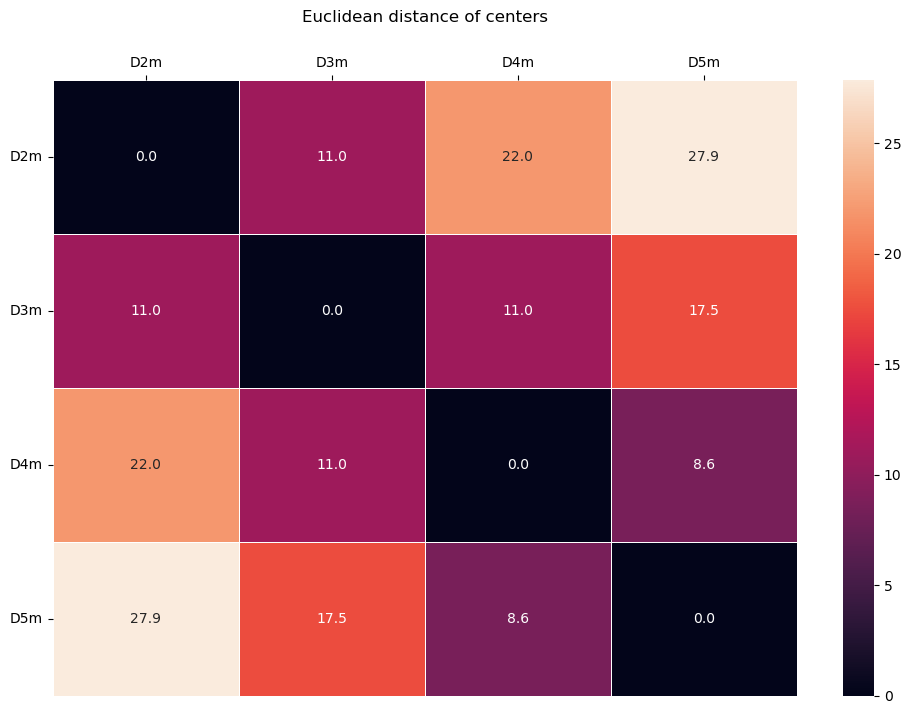

In [25]:
# distance between medial phalanges on the map

sp.plot_distance_phalanges(weights, hand_pop, phalange='m')

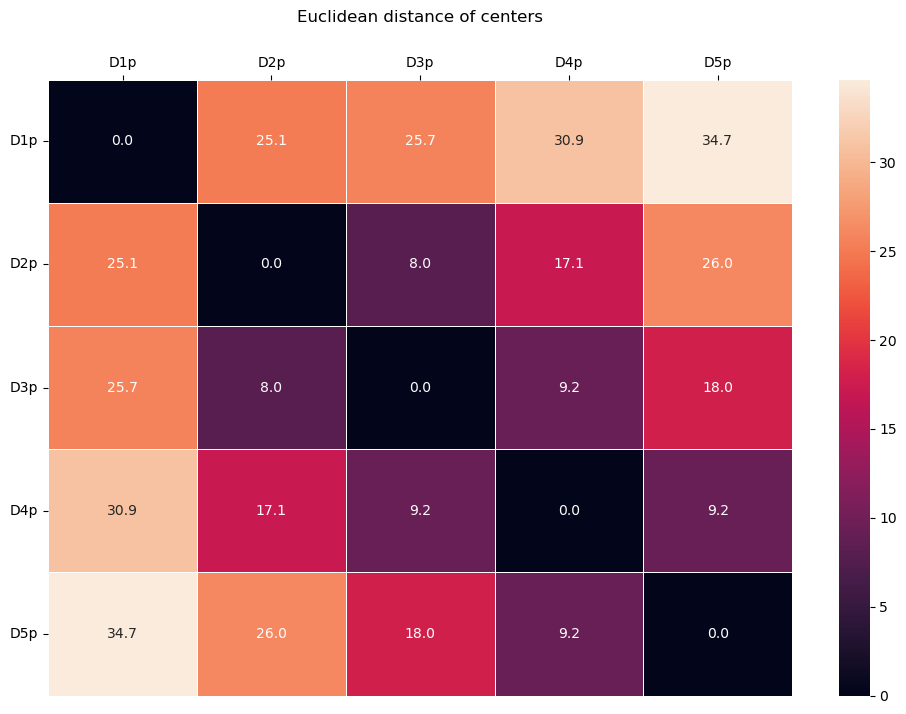

In [26]:
# distance between proximal phalanges on the map

sp.plot_distance_phalanges(weights, hand_pop, phalange='p')

### Distances with 'Max unit'

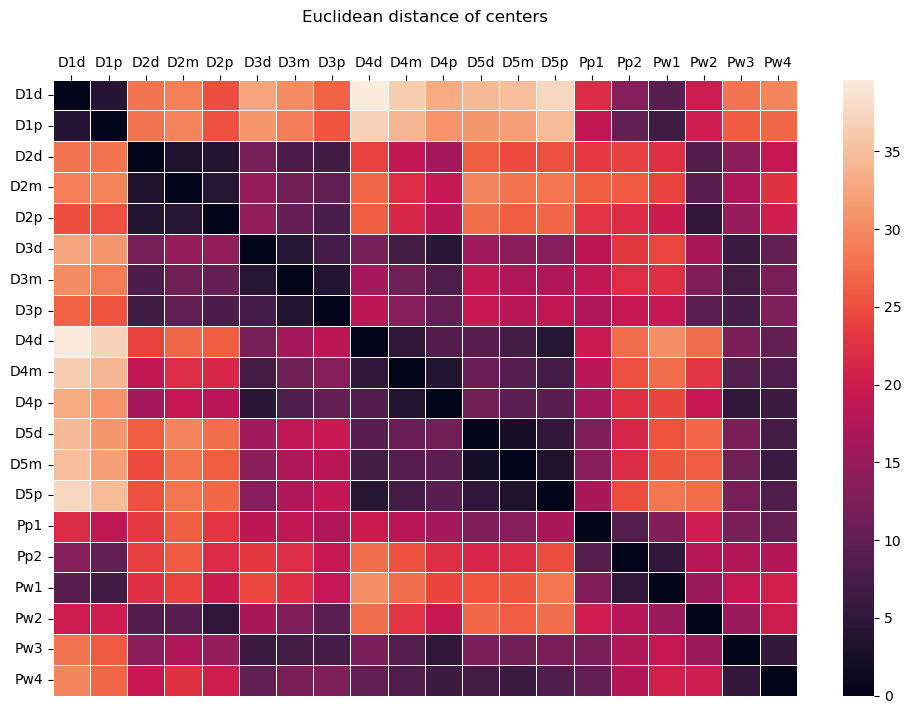

In [27]:
# Distances between hand regions on the map

cent = sp.plot_distance_all(weights, hand_pop, method='max_unit')

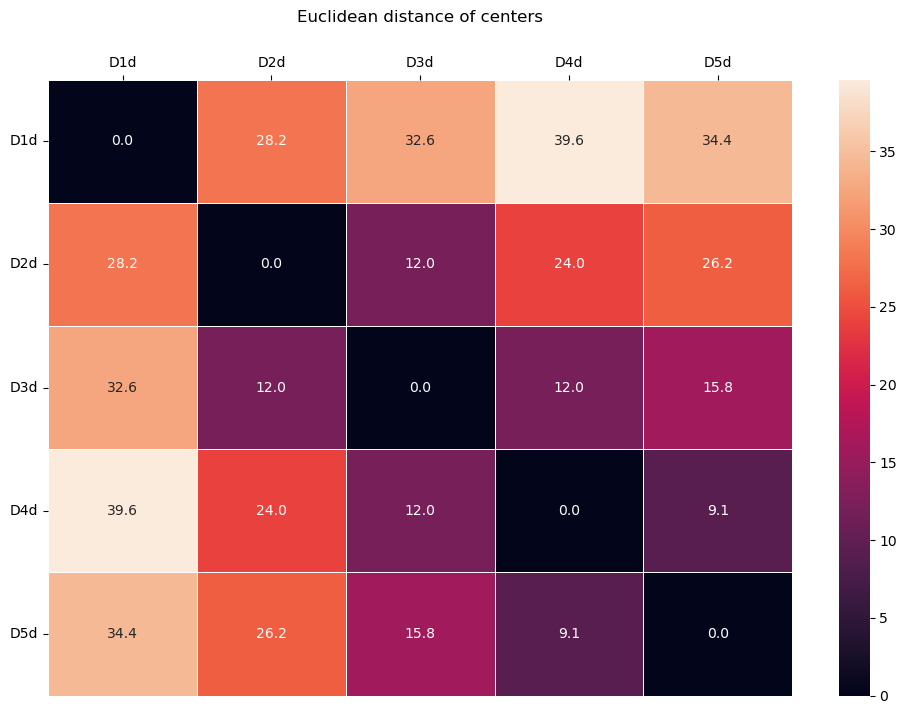

In [28]:
# distance between fingertips on the map.

sp.plot_distance_phalanges(weights, hand_pop, phalange='d', method='max_unit')

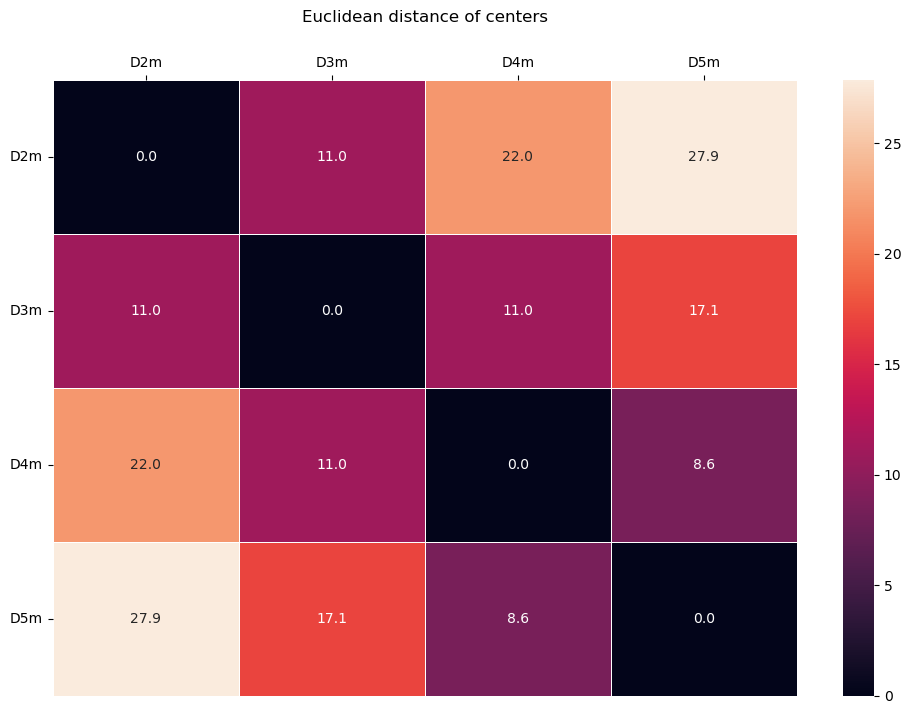

In [29]:
# distance between medial phalanges on the map

sp.plot_distance_phalanges(weights, hand_pop, phalange='m', method='max_unit')

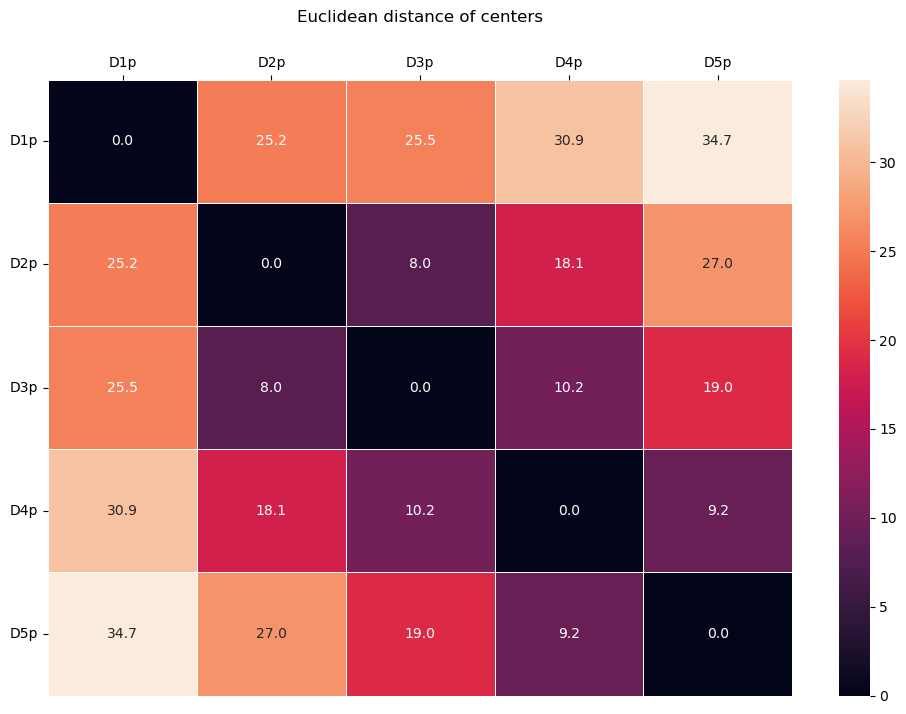

In [30]:
# distance between proximal phalanges on the map

sp.plot_distance_phalanges(weights, hand_pop, phalange='p', method='max_unit')

### Distances with 'COM'

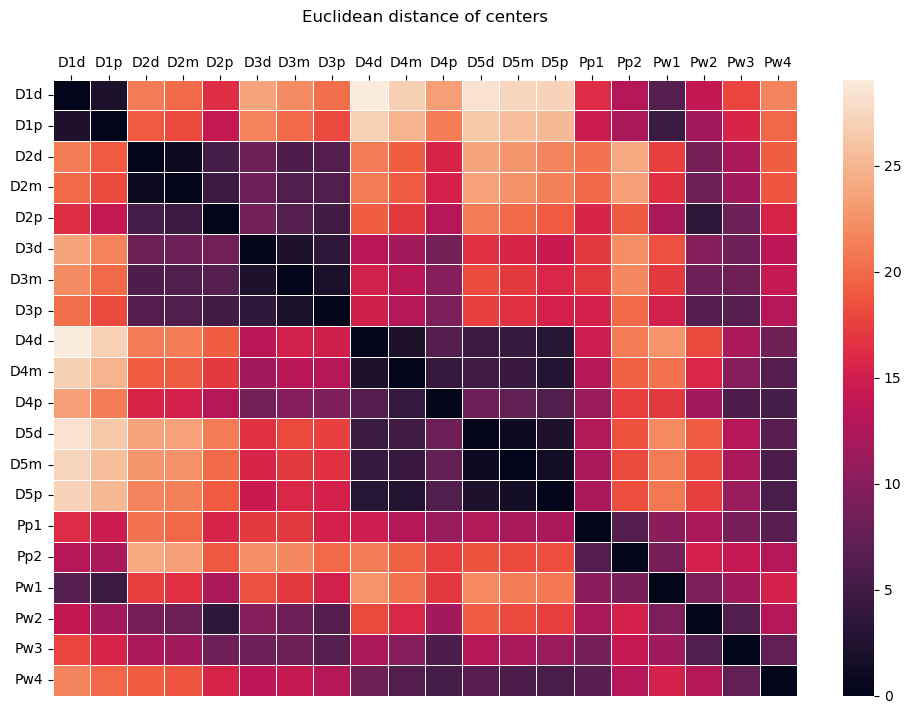

In [31]:
# Distances between hand regions on the map

cent = sp.plot_distance_all(weights, hand_pop, method='com')

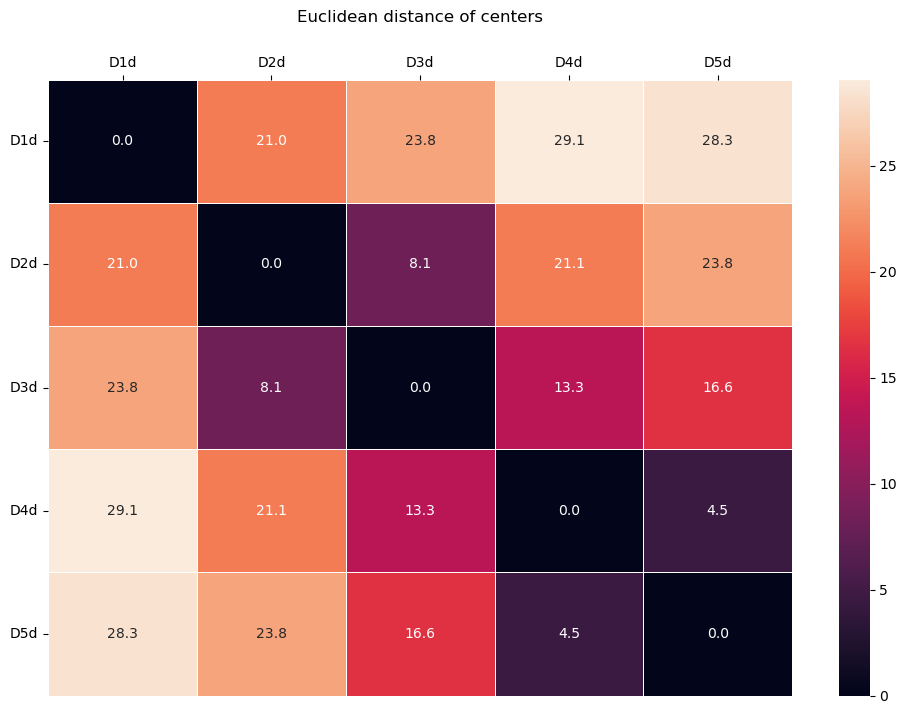

In [32]:
# distance between fingertips on the map.

sp.plot_distance_phalanges(weights, hand_pop, phalange='d',method='com')

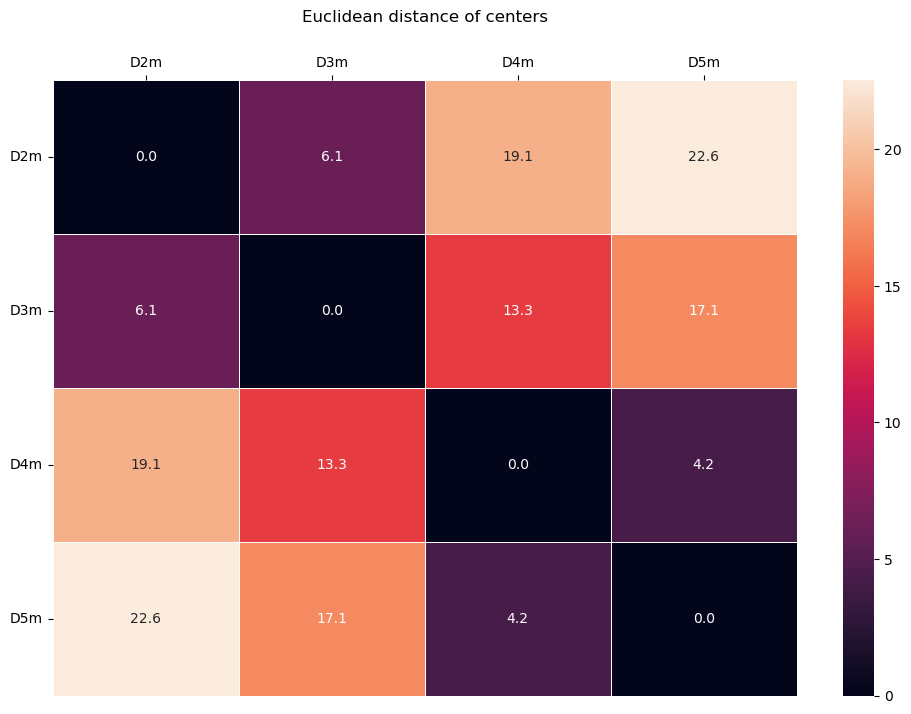

In [33]:
# distance between medial phalanges on the map

sp.plot_distance_phalanges(weights, hand_pop, phalange='m',method='com')

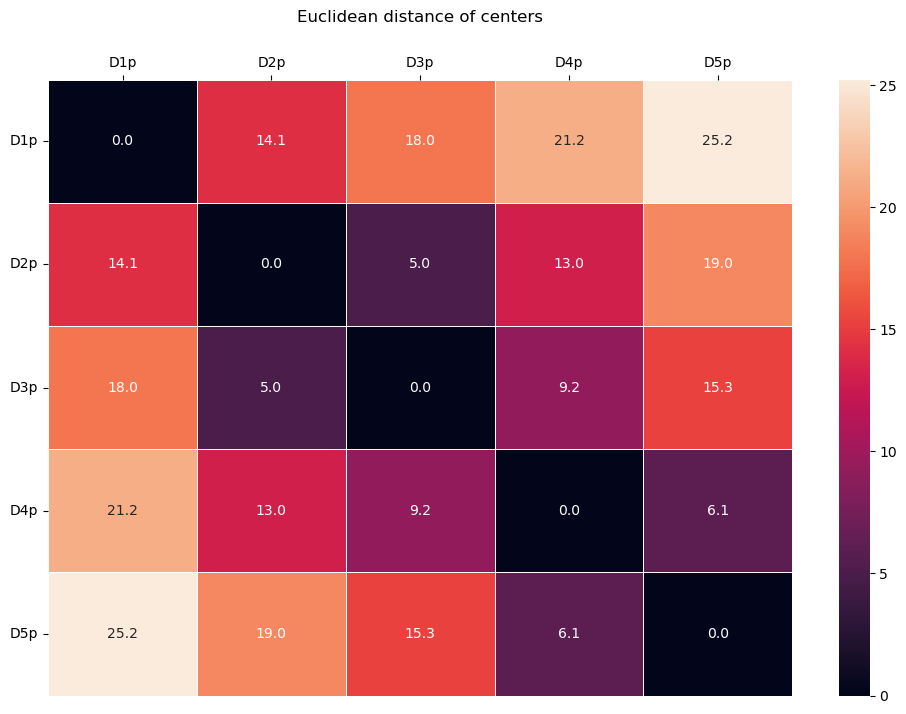

In [34]:
# distance between proximal phalanges on the map

sp.plot_distance_phalanges(weights, hand_pop, phalange='p',method='com')

## Peak to peak distances
Calculates the distances between the peak representation for each region.

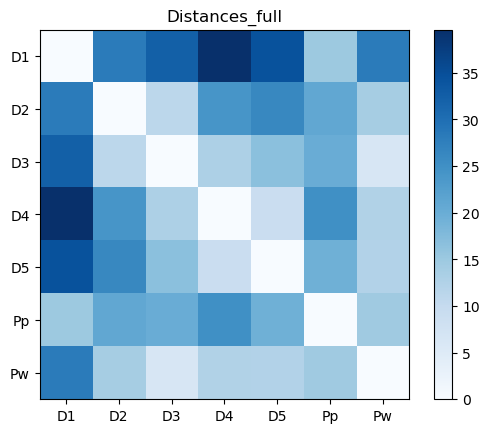

In [35]:
peak_coords, _  = sp.peak_map_coords(weights, hand_pop.hand_main)

peak_distances = sp.peak_map_distances(peak_coords, hand_pop.hand_main['region_list'], plot=True)

## Distances on the map

### Plot peak activation on the map- main regions

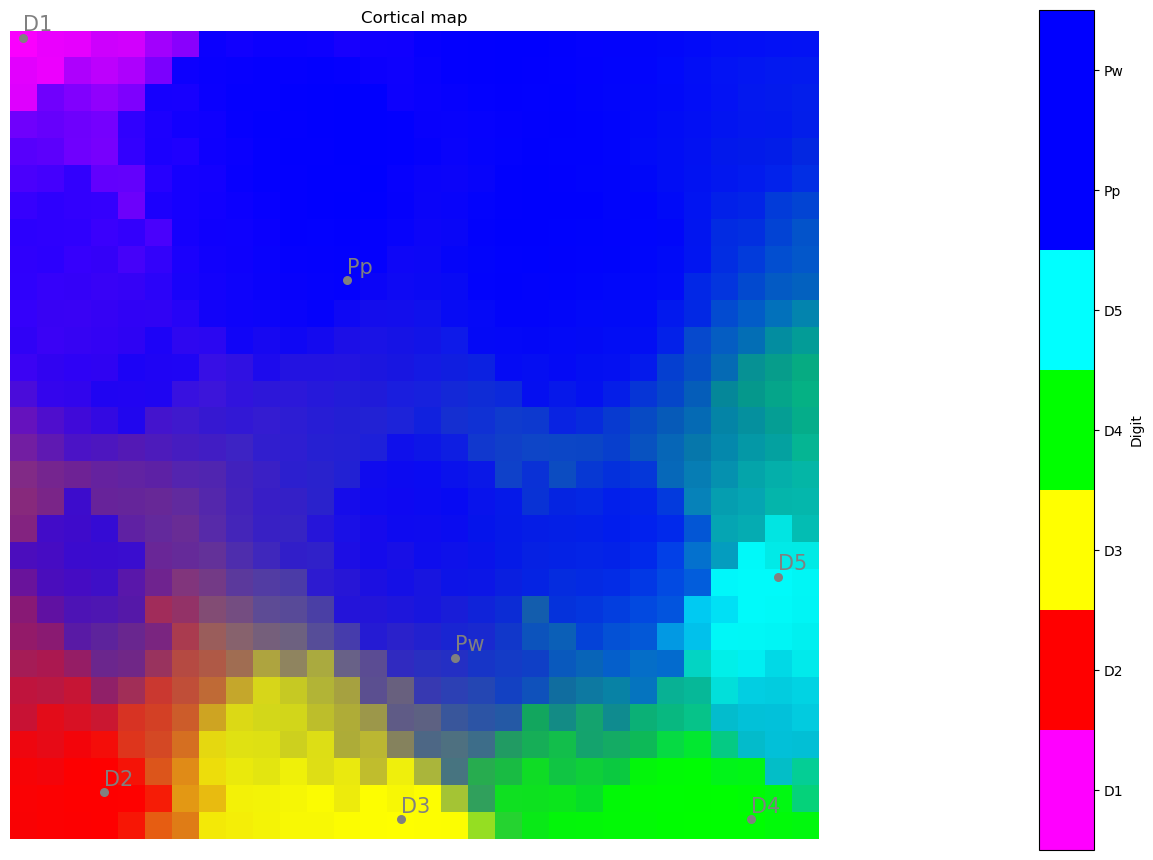

In [36]:
region_maps = sp.region_weight_matrices(weights, hand_pop.hand_main)[1]

peak_coords = sp.map_centroids(method='max_unit', region_maps=region_maps, group_name=hand_pop.hand_main['region_list'])[1]

# plot overlaid
sp.plot_map_overlay_coord(peak_coords, weights, hand_pop.hand_main)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

### Plot peak activation on the map- sub regions

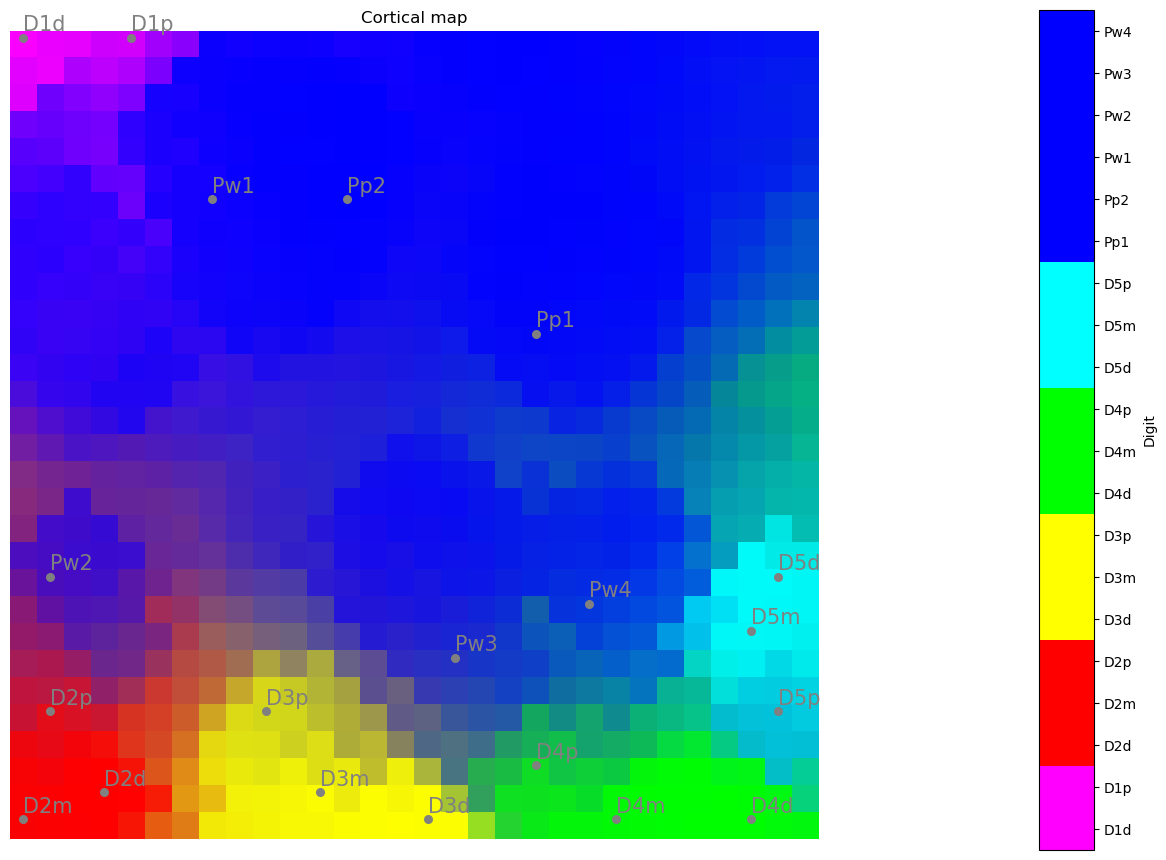

In [37]:
region_maps = sp.region_weight_matrices(weights, hand_pop.hand_sub)[1]

peak_coords = sp.map_centroids(method='max_unit', region_maps=region_maps, group_name=hand_pop.hand_sub['region_list'])[1]

# plot overlaid
sp.plot_map_overlay_coord(peak_coords, weights, hand_pop.hand_sub)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

### Plot COM activation on the map- main regions

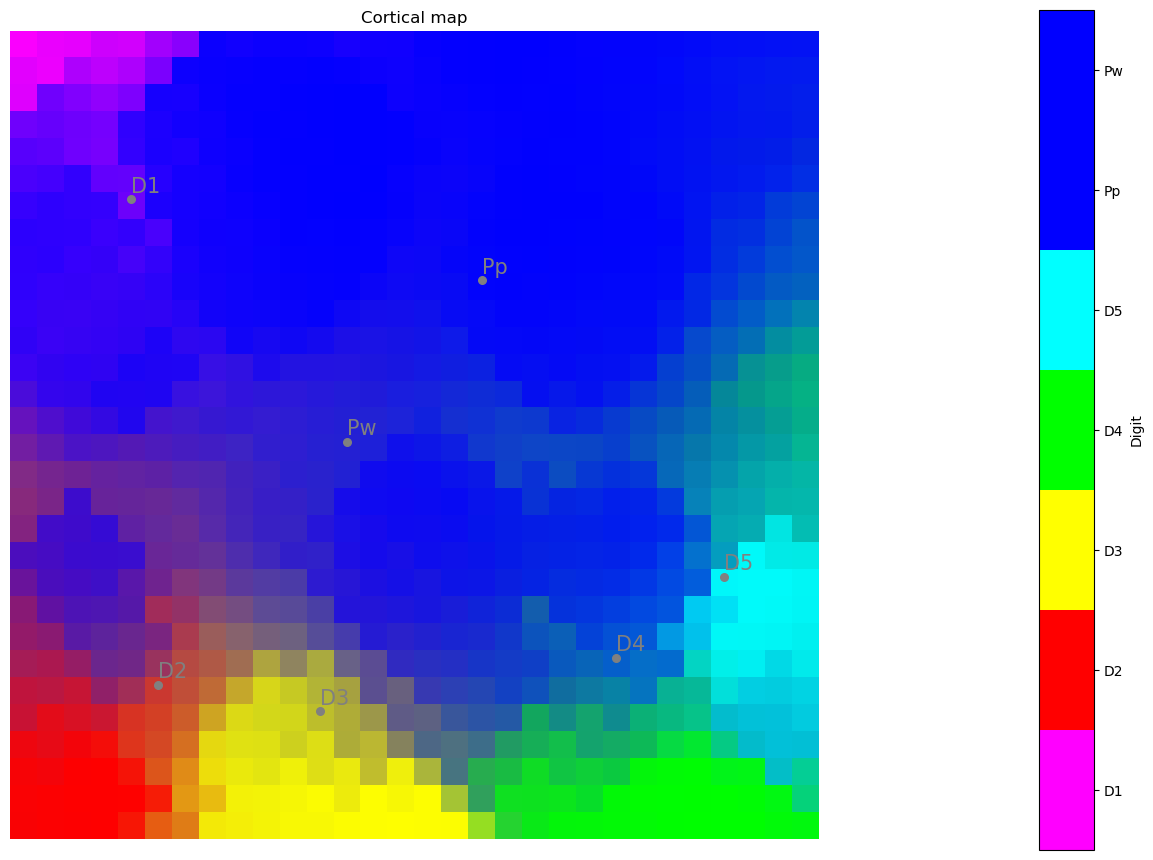

In [38]:
region_maps = sp.region_weight_matrices(weights, hand_pop.hand_main)[1]

# calculate centre of mass coordinates
com_coords = sp.map_centroids(method='com', region_maps=region_maps,group_name=hand_pop.hand_main['region_list'])[1]

# plot overlaid
sp.plot_map_overlay_coord(com_coords, weights, hand_pop.hand_main)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

### Plot COM activation on the map- sub regions

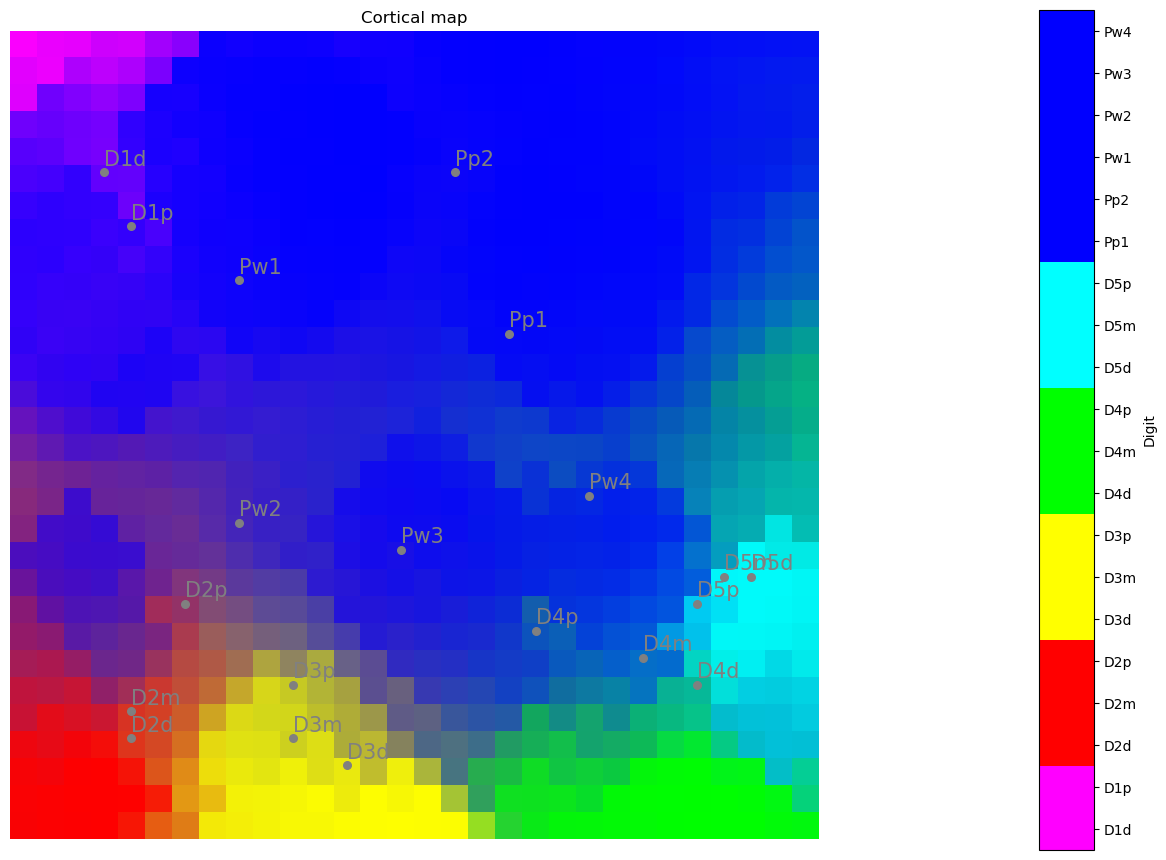

In [39]:
region_maps = sp.region_weight_matrices(weights, hand_pop.hand_sub)[1]

# calculate centre of mass coordinates
com_coords = sp.map_centroids(method='com', region_maps=region_maps, group_name=hand_pop.hand_sub['region_list'])[1]

# plot overlaid 
sp.plot_map_overlay_coord(com_coords, weights, hand_pop.hand_sub)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

### Plot max unit in hand mesh centroids on the map- main regions

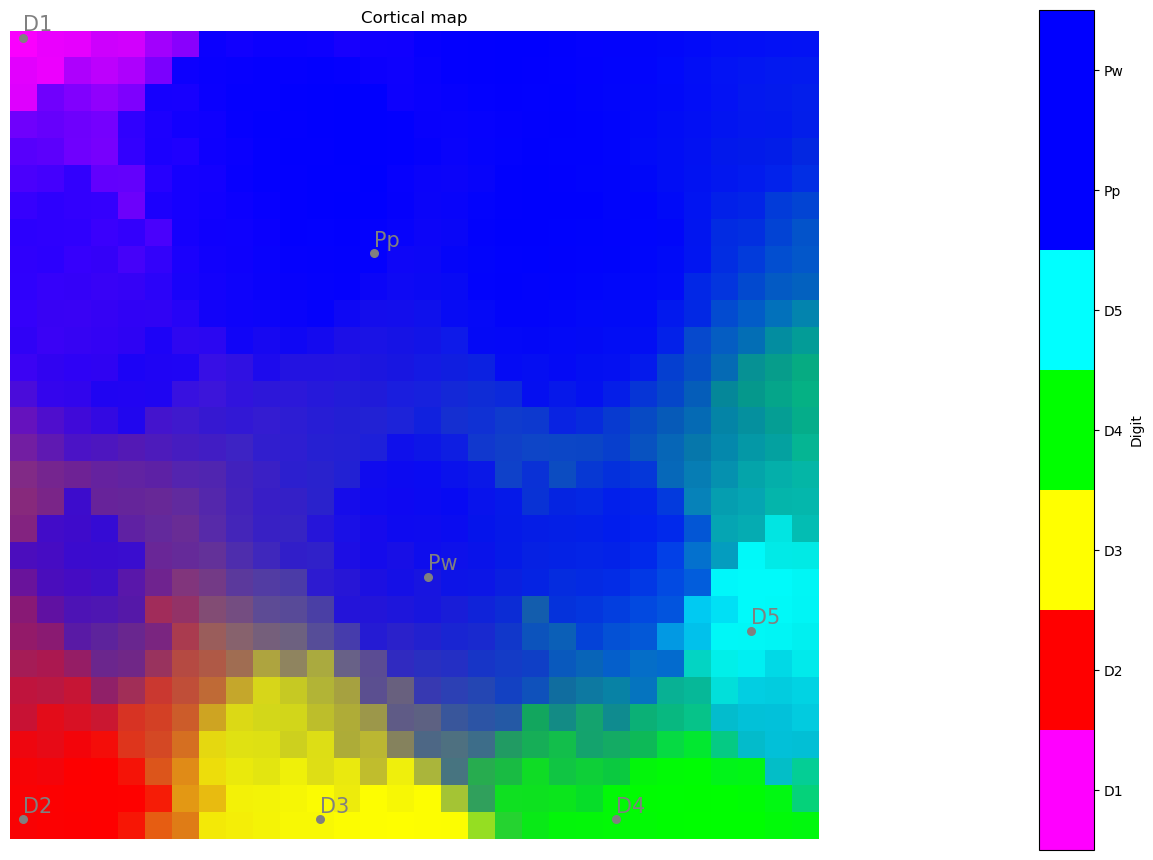

In [40]:
hand_mesh_coords = sp.map_centroids(method='hand_max_unit', group_name=hand_pop.hand_main['region_list'], hand_rp=hand_pop.hand_rp_main, 
                                                                    weights=weights, ss_a=30, ss_b=30)[1]

# plot overlaid
sp.plot_map_overlay_coord(hand_mesh_coords, weights, hand_pop.hand_main)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

### Plot max unit in hand mesh centroids on the map- sub regions

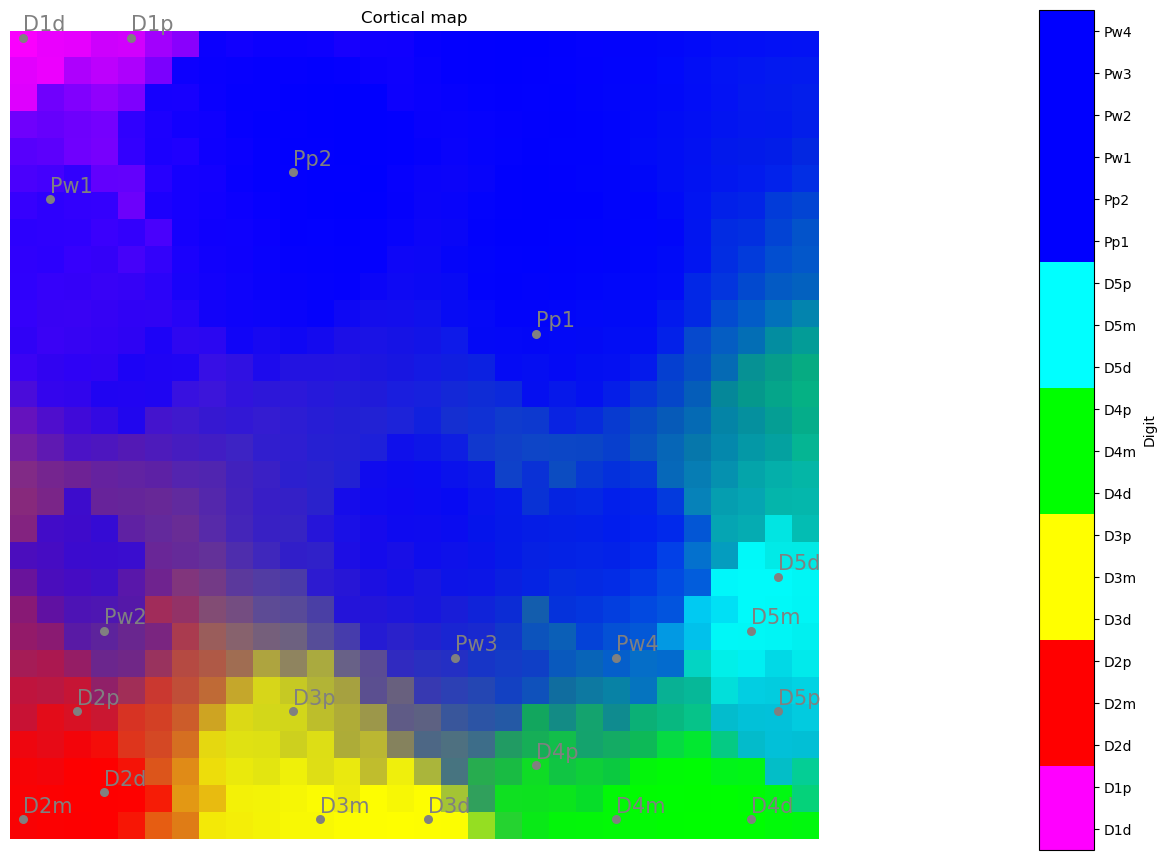

In [41]:
hand_mesh_coords = sp.map_centroids(method='hand_max_unit', group_name=hand_pop.hand_sub['region_list'], hand_rp=hand_pop.hand_rp_sub, 
                                                                        weights=weights, ss_a=30, ss_b=30)[1]

# plot overlaid
sp.plot_map_overlay_coord(hand_mesh_coords, weights, hand_pop.hand_sub)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

## Hand mesh

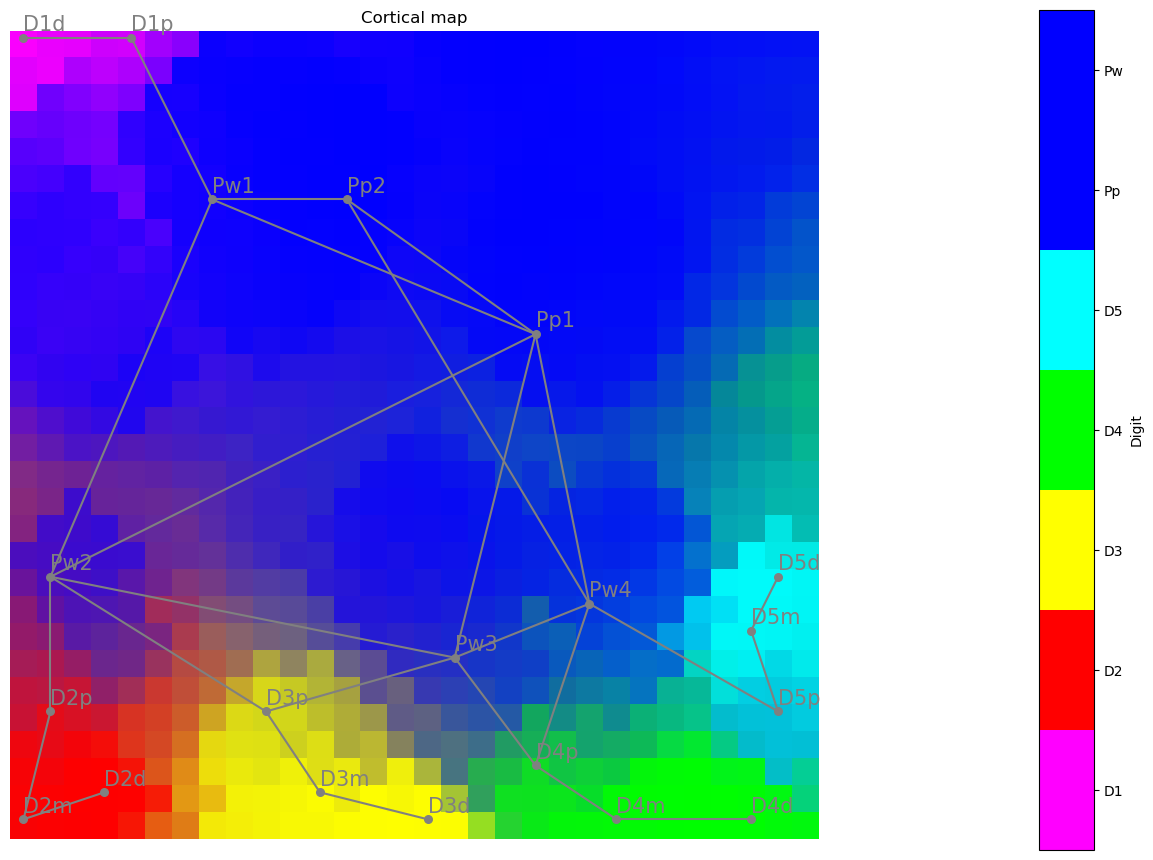

In [42]:
# to plot without labels (labels=False)
# method can be changed- default is 'max_unit'

sp.map_mesh(weights, hand_pop, labels=True, method='max_unit')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

## Receptive fields

Calculates the receptive fields on the hand for each unit. 

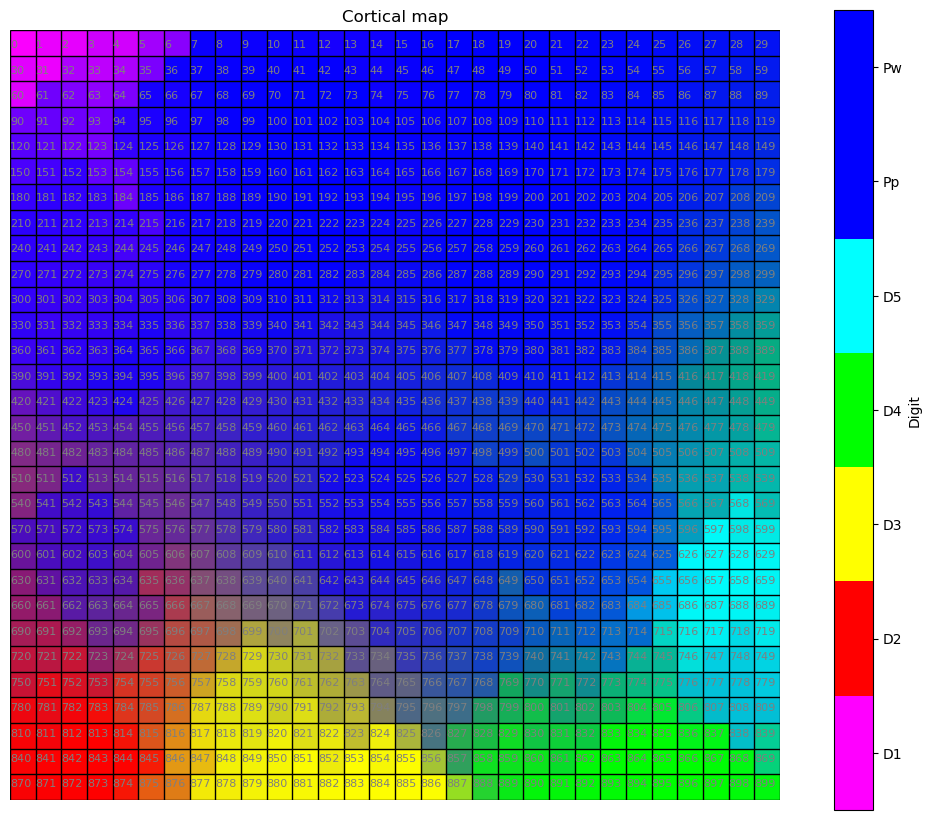

In [43]:
# show the unit map 
sp.unit_code_map(weights, hand_pop.hand_main)
fig = plt.gcf()
fig.set_size_inches(13, 10)

#### Contributions to each map unit
Shows which regions of the hand the map weights originate from, and percentage for each.

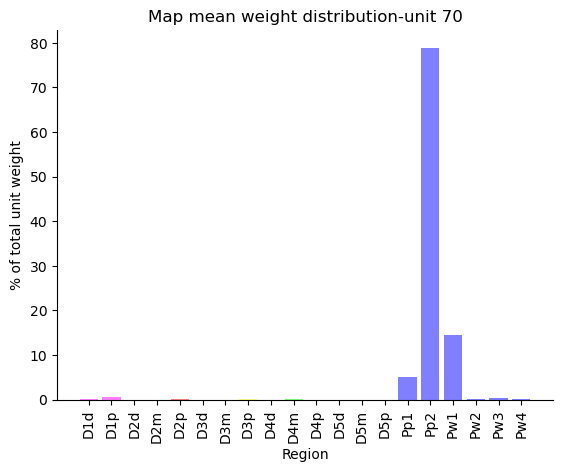

In [44]:
# show the total weight allocation to each region (mean over the number of afferents). No threshold is included here.
sp.rf_region_contribution(weights, hand_pop, unit=70, plot=True);

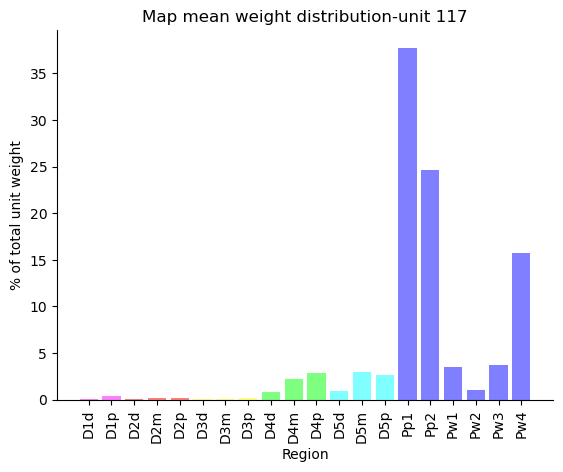

In [45]:
# show the total weight allocation to each region (mean over the number of afferents)
sp.rf_region_contribution(weights, hand_pop, unit=117, plot=True);

### Visualising Receptive fields
Receptive fields for two example units above. If the total weight is thresholded, which afferents contribute most to the map weight?


Calculation is done by creating a circle encompassing all afferents in the receptive field or by taking a convex hull of all the afferents.

Area size of the receptive field is calculated by taking the intersection of the receptive field area and the hand area covered by it.

#### Receptive field for unit 70 on map

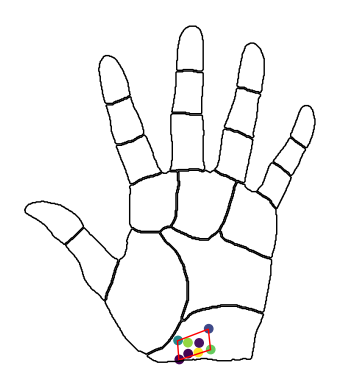

In [46]:
# CONVEX HULL EXAMPLE

# select a unit and show the receptive field, calculate the size of the RF using the convex hull calculation
sp.receptive_fields(weights, hand_pop, threshold = 40, unit = 70, plot =True);

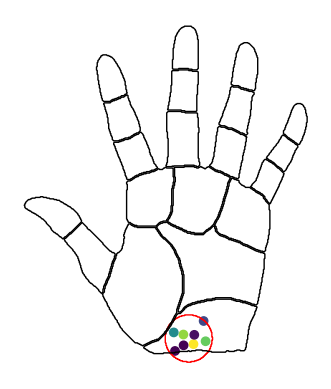

In [47]:
# Circle EXAMPLE

# select a unit and show the receptive field, calculate the size of the RF.
sp.receptive_fields(weights, hand_pop, threshold = 40, unit = 70, plot =True, calc_type='circle');

#### Receptive field for unit 117 on map

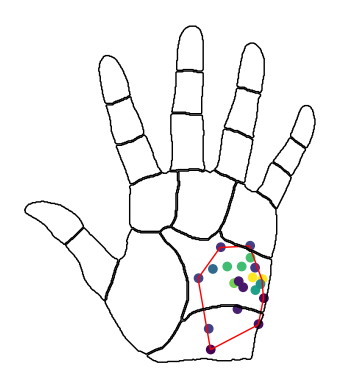

In [48]:
# select another unit and show the receptive field, calculate the size of the RF
sp.receptive_fields(weights, hand_pop, threshold = 40, unit = 117, plot = True);

### Rf sizes with increasing threshold
What is the range of receptive field sizes when the threshold for weight inclusion is changed?
The following plots show the range of rf sizes as a percentage of total hand size when the threshold is 25, 50, 70 and 99. As would be expected, the rf sizes get bigger the more weights (and therefore afferents) that are included in the calculation.

#### 25 threshold

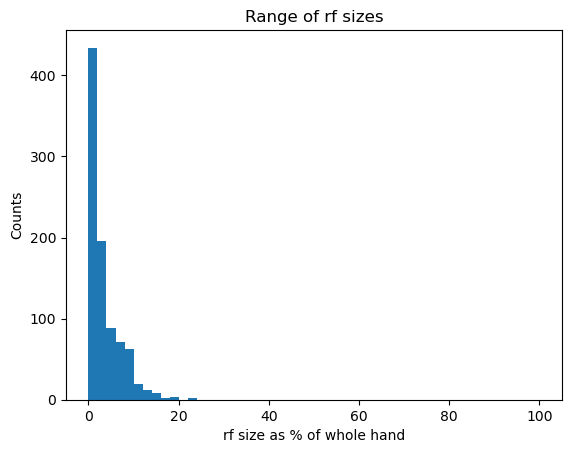

In [49]:
# show average area size of RF for each map unit (same threshold). Shows as a percentage of the total hand size.
sp.rf_sizes(weights, hand_pop, threshold=25, plot=True);

#### 50 threshold

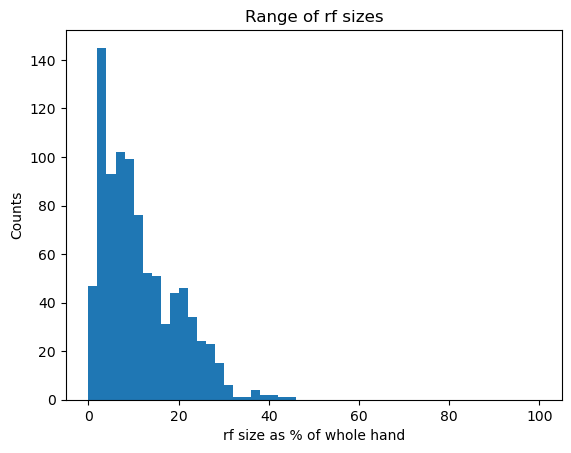

In [50]:
# show average area size of RF for each map unit (same threshold). Shows as a percentage of the total hand size.
sp.rf_sizes(weights, hand_pop, threshold=50, plot=True);

#### 70 threshold

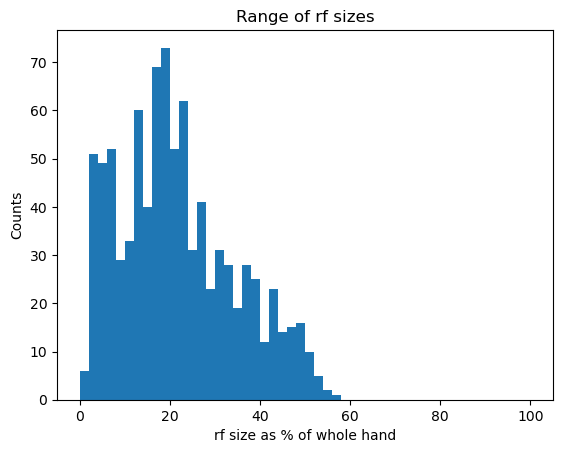

In [51]:
# show average area size of RF for each map unit (same threshold). Shows as a percentage of the total hand size.
sp.rf_sizes(weights, hand_pop, threshold=70, plot=True);

#### 99 threshold

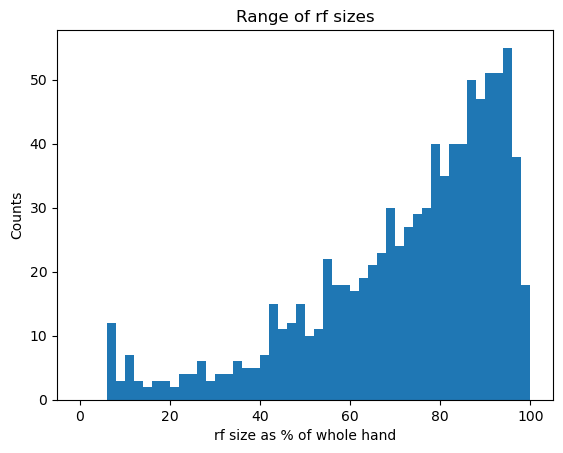

In [52]:
# show average area size of RF for each map unit (same threshold). Shows as a percentage of the total hand size.
sp.rf_sizes(weights, hand_pop, threshold=99, plot=True);